In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
#create a new instance of the bigquery client
from google.cloud import bigquery

client = bigquery.Client()

In [3]:
#creating complete dataset from 2017 to 2018
query = """

SELECT

datetime,EXTRACT(date FROM o.datetime) as Is_day, EXTRACT(Year FROM o.datetime) as year, EXTRACT(month FROM o.datetime) as month,count(o.output_price) as transaction_count, ROUND(SUM(o.output_price)*(0.00000001),2) AS BTC
FROM (
  SELECT
    timestamp,TIMESTAMP_MILLIS((timestamp - MOD(timestamp,3600000))) AS hour, TIMESTAMP_MILLIS(CAST((timestamp) AS INT64)) as datetime,
    output.output_satoshis AS output_price
   FROM
    `bigquery-public-data.bitcoin_blockchain.transactions`,
    UNNEST(outputs) AS output ) AS o
GROUP BY datetime,month, Is_day, year
Having year=2017 or (year=2018 and (month=9 or month=8 or month=7)) 
 
order by is_day, BTC DESC



"""
#execute query using the query method of our client instance and assign it to a variable 
query_job = client.query(query)

iterator = query_job.result(timeout=30)
#obtain a number of records using 
rows = list(iterator)

# Transform the rows into a panda dataframe
data = pd.DataFrame(data=[list(a.values()) for a in rows], columns=list(rows[0].keys()))
data.head(10)

,datetime,Is_day,year,month,transaction_count,BTC
0,2017-01-01 17:23:42+00:00,2017-01-01,2017,1,5507,30367.34
1,2017-01-01 06:06:50+00:00,2017-01-01,2017,1,6605,26215.55
2,2017-01-01 12:36:47+00:00,2017-01-01,2017,1,6014,25927.32
3,2017-01-01 04:01:57+00:00,2017-01-01,2017,1,6287,23586.61
4,2017-01-01 21:53:02+00:00,2017-01-01,2017,1,4985,22850.75
5,2017-01-01 14:26:32+00:00,2017-01-01,2017,1,4861,19207.86
6,2017-01-01 00:32:32+00:00,2017-01-01,2017,1,7030,19117.57
7,2017-01-01 03:13:55+00:00,2017-01-01,2017,1,5593,18846.33
8,2017-01-01 00:58:13+00:00,2017-01-01,2017,1,4900,18750.97
9,2017-01-01 23:27:28+00:00,2017-01-01,2017,1,5273,18715.33


In [4]:
#creating training dataset using Year 2018
query = """

SELECT

datetime,EXTRACT(date FROM o.datetime) as Is_day, EXTRACT(Year FROM o.datetime) as year, count(o.output_price) as transaction_count, ROUND(SUM(o.output_price)*(0.00000001),2) AS BTC
FROM (
  SELECT
    timestamp,TIMESTAMP_MILLIS((timestamp - MOD(timestamp,3600000))) AS hour, TIMESTAMP_MILLIS(CAST((timestamp) AS INT64)) as datetime,
    output.output_satoshis AS output_price
   FROM
    `bigquery-public-data.bitcoin_blockchain.transactions`,
    UNNEST(outputs) AS output ) AS o
GROUP BY datetime,Is_day, year
Having year=2017
 
order by is_day, BTC DESC



"""
#execute query using the query method of our client instance and assign it to a variable 
query_job = client.query(query)

iterator = query_job.result(timeout=30)
#obtain a number of records using 
rows = list(iterator)

# Transform the rows into a panda dataframe
train = pd.DataFrame(data=[list(a.values()) for a in rows], columns=list(rows[0].keys()))
train.head(10)

,datetime,Is_day,year,transaction_count,BTC
0,2017-01-01 17:23:42+00:00,2017-01-01,2017,5507,30367.34
1,2017-01-01 06:06:50+00:00,2017-01-01,2017,6605,26215.55
2,2017-01-01 12:36:47+00:00,2017-01-01,2017,6014,25927.32
3,2017-01-01 04:01:57+00:00,2017-01-01,2017,6287,23586.61
4,2017-01-01 21:53:02+00:00,2017-01-01,2017,4985,22850.75
5,2017-01-01 14:26:32+00:00,2017-01-01,2017,4861,19207.86
6,2017-01-01 00:32:32+00:00,2017-01-01,2017,7030,19117.57
7,2017-01-01 03:13:55+00:00,2017-01-01,2017,5593,18846.33
8,2017-01-01 00:58:13+00:00,2017-01-01,2017,4900,18750.97
9,2017-01-01 23:27:28+00:00,2017-01-01,2017,5273,18715.33


In [48]:
#creating training dataset using Year 2018
query = """

SELECT

datetime,EXTRACT(date FROM o.datetime) as Is_day, EXTRACT(Year FROM o.datetime) as year, EXTRACT(month FROM o.datetime) as month, count(o.output_price) as transaction_count, ROUND(SUM(o.output_price)*(0.00000001),2) AS BTC
FROM (
  SELECT
    TIMESTAMP_MILLIS((timestamp - MOD(timestamp,3600000))) AS hour, TIMESTAMP_MILLIS(CAST((timestamp) AS INT64)) as datetime,
    output.output_satoshis AS output_price
   FROM
    `bigquery-public-data.bitcoin_blockchain.transactions`,
    UNNEST(outputs) AS output ) AS o
GROUP BY datetime,Is_day, month, year
Having year=2018 and (month=9 or month=8 or month=7) 
 
order by datetime 




"""
#execute query using the query method of our client instance and assign it to a variable 
query_job = client.query(query)

iterator = query_job.result(timeout=30)
#obtain a number of records using 
rows = list(iterator)

# Transform the rows into a panda dataframe
test = pd.DataFrame(data=[list(a.values()) for a in rows], columns=list(rows[0].keys()))
test.head(10)

,datetime,Is_day,year,month,transaction_count,BTC
0,2018-07-01 00:13:18+00:00,2018-07-01,2018,7,4765,7523.65
1,2018-07-01 00:13:50+00:00,2018-07-01,2018,7,153,182.55
2,2018-07-01 00:16:28+00:00,2018-07-01,2018,7,825,1005.54
3,2018-07-01 00:17:45+00:00,2018-07-01,2018,7,254,2083.39
4,2018-07-01 00:45:40+00:00,2018-07-01,2018,7,8773,11263.09
5,2018-07-01 00:47:01+00:00,2018-07-01,2018,7,611,319.85
6,2018-07-01 00:50:13+00:00,2018-07-01,2018,7,618,903.13
7,2018-07-01 00:56:55+00:00,2018-07-01,2018,7,4242,3773.72
8,2018-07-01 01:10:25+00:00,2018-07-01,2018,7,5229,11372.31
9,2018-07-01 01:12:36+00:00,2018-07-01,2018,7,485,301.68


In [49]:

train.index= train.datetime

test.index= test.datetime
data.index= data.datetime
test.index



DatetimeIndex(['2018-07-01 00:13:18+00:00', '2018-07-01 00:13:50+00:00',
               '2018-07-01 00:16:28+00:00', '2018-07-01 00:17:45+00:00',
               '2018-07-01 00:45:40+00:00', '2018-07-01 00:47:01+00:00',
               '2018-07-01 00:50:13+00:00', '2018-07-01 00:56:55+00:00',
               '2018-07-01 01:10:25+00:00', '2018-07-01 01:12:36+00:00',
               ...
               '2018-09-10 11:58:15+00:00', '2018-09-10 11:59:47+00:00',
               '2018-09-10 12:26:16+00:00', '2018-09-10 12:55:26+00:00',
               '2018-09-10 12:58:21+00:00', '2018-09-10 13:01:16+00:00',
               '2018-09-10 13:04:23+00:00', '2018-09-10 13:13:24+00:00',
               '2018-09-10 13:21:01+00:00', '2018-09-10 13:23:25+00:00'],
              dtype='datetime64[ns, UTC]', name='datetime', length=10607, freq=None)

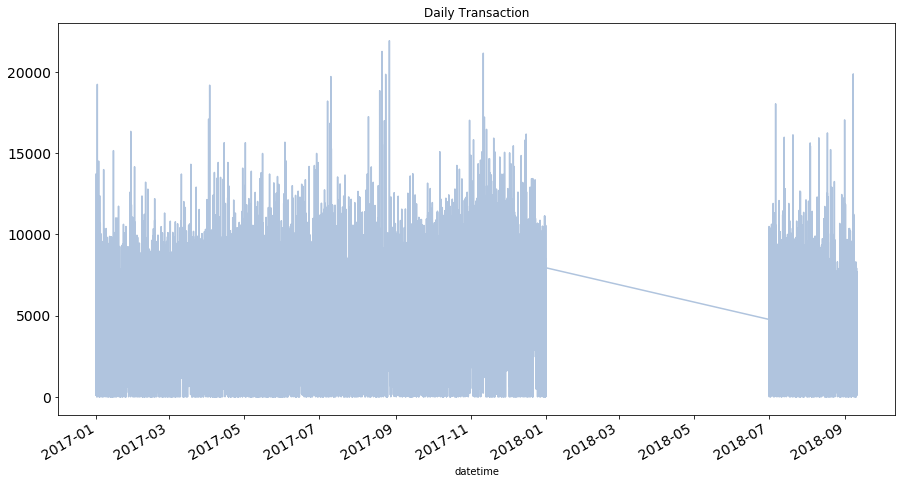

In [50]:
data.transaction_count.plot.line(figsize=(15,8), title= 'Daily Transaction', fontsize=14,color='lightsteelblue')
plt.show()

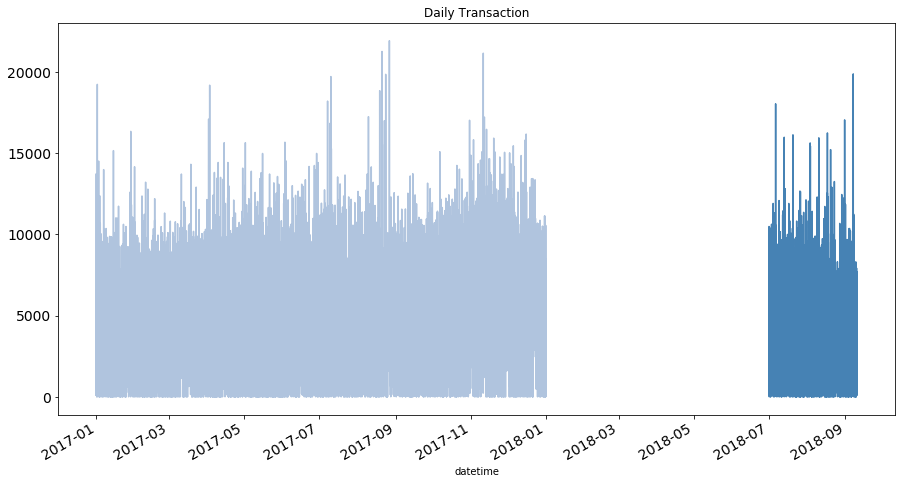

In [8]:
train.transaction_count.plot.line(figsize=(15,8), title= 'Daily Transaction', fontsize=14,color='lightsteelblue')
test.transaction_count.plot.line(figsize=(15,8), title= 'Daily Transaction', fontsize=14, color='steelblue')
plt.show()

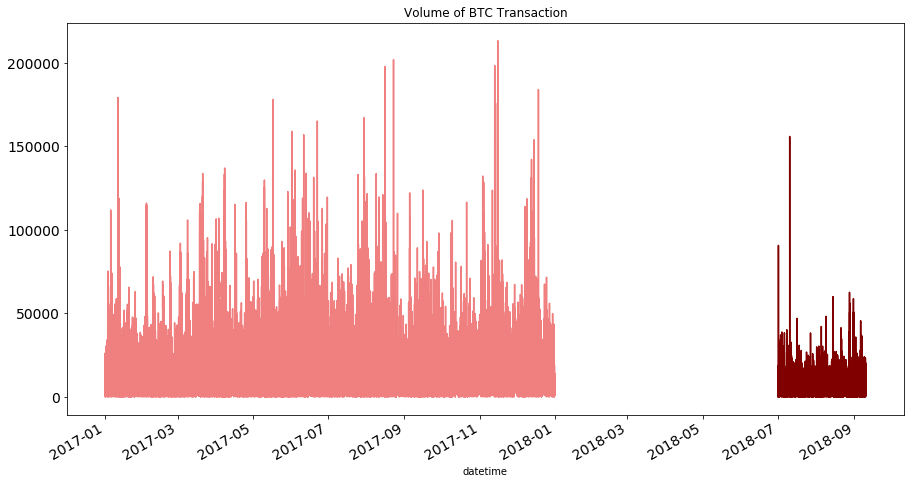

In [9]:
train.BTC.plot(figsize=(15,8), title= 'Volume of BTC Transaction', fontsize=14, color='lightcoral')
test.BTC.plot(figsize=(15,8), title= 'Volume of BTC Transaction', fontsize=14, color='maroon')
plt.show()

In [10]:
#importing packages for the prediction of time-series data
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import statsmodels.formula.api as smf
from statsmodels.tsa.stattools import adfuller

from sklearn.metrics import mean_squared_error

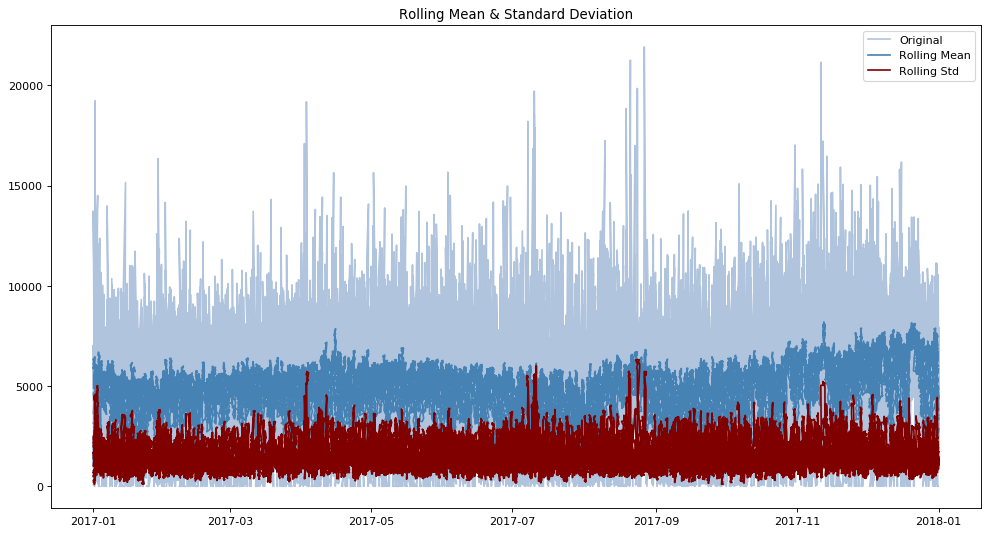

ADF Stastistic: -27.317486
p-value: 0.000000
The graph is stationery
Critical values:
	1%: -3.430 
	5%: -2.862 
	10%: -2.567 


In [11]:
# checking for stationarity, using Augmented Dicky Fuller Test: since p-value <0.05- the data is stationary.
def test_stationarity(x):


    #Determing rolling statistics
    rolmean = x.rolling(window=22,center=False).mean()

    rolstd = x.rolling(window=12,center=False).std()
    
    #Plot rolling statistics:
    plt.figure(num=None, figsize=(15, 8), dpi=80, facecolor='w', edgecolor='k')
    orig = plt.plot(x, color='lightsteelblue',label='Original')
    mean = plt.plot(rolmean, color='steelblue', label='Rolling Mean')
    std = plt.plot(rolstd, color='maroon', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
      #Perform Dickey Fuller test    
    result=adfuller(x)
    print('ADF Stastistic: %f'%result[0])
    print('p-value: %f'%result[1])
    pvalue=result[1]
    for key,value in result[4].items():
         if result[0]>value:
            print("The graph is non stationery")
            break
         else:
            print("The graph is stationery")
            break;
    print('Critical values:')
    for key,value in result[4].items():
        print('\t%s: %.3f ' % (key, value))
        
ts = train['transaction_count']   
test_stationarity(ts)

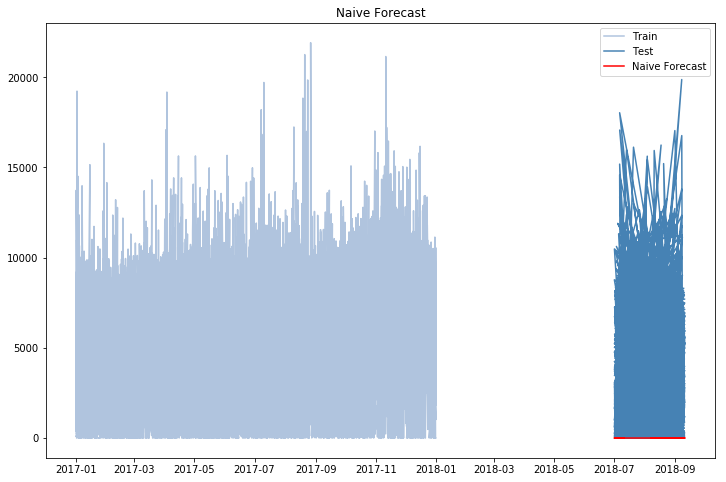

Root Mean Sqaure = 4522.32241565233


In [12]:
from sklearn.metrics import mean_squared_error
from math import sqrt

#Method 1: – Naive Forecast
dd= np.asarray(train.transaction_count)
y_hat = test.copy()
y_hat['naive'] = dd[len(dd)-1]
plt.figure(figsize=(12,8))
plt.plot(train.index, train['transaction_count'], label='Train',color='lightsteelblue')
plt.plot(test.index,test['transaction_count'], label='Test', color='steelblue')
plt.plot(y_hat.index,y_hat['naive'], label='Naive Forecast', color='r')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.show()
rms = sqrt(mean_squared_error(test.transaction_count, y_hat.naive))
print("Root Mean Sqaure =",rms)

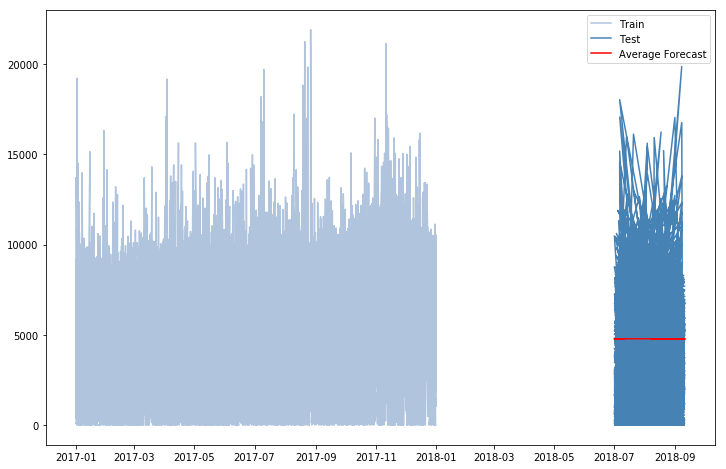

Root Mean Sqaure = 2676.410031994504


In [13]:
#Method 2: – Simple Average
y_hat_avg = test.copy()
y_hat_avg['avg_forecast'] = train['transaction_count'].mean()
plt.figure(figsize=(12,8))
plt.plot(train['transaction_count'], label='Train', color='lightsteelblue')
plt.plot(test['transaction_count'], label='Test', color='steelblue')
plt.plot(y_hat_avg['avg_forecast'], label='Average Forecast', color='r')
plt.legend(loc='best')
plt.show()

rms = sqrt(mean_squared_error(test.transaction_count, y_hat_avg.avg_forecast))
print("Root Mean Sqaure =",rms)

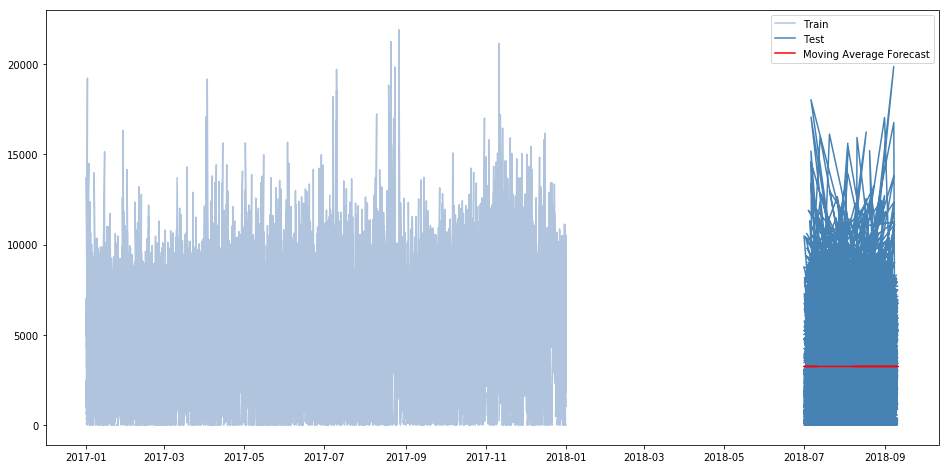

Root Mean Sqaure = 2539.1451363366405


In [14]:
#Method 3: – Moving Average
y_hat_avg = test.copy()
y_hat_avg['moving_avg_forecast'] = train['transaction_count'].rolling(60).mean().iloc[-1]
plt.figure(figsize=(16,8))
plt.plot(train['transaction_count'], label='Train', color='lightsteelblue')
plt.plot(test['transaction_count'], label='Test', color='steelblue')
plt.plot(y_hat_avg['moving_avg_forecast'], label='Moving Average Forecast', color='r')
plt.legend(loc='best')
plt.show()

rms = sqrt(mean_squared_error(test.transaction_count, y_hat_avg.moving_avg_forecast))
print("Root Mean Sqaure =",rms)

In [51]:
# imputing missing values
test.transaction_count[np.isnan(test.transaction_count)] = np.median(test.transaction_count[~np.isnan(test.transaction_count)])
test1.transaction_count[np.isnan(test1.transaction_count)] = np.median(test1.transaction_count[~np.isnan(test1.transaction_count)])
train.transaction_count[np.isnan(train.transaction_count)] = np.median(train.transaction_count[~np.isnan(train.transaction_count)])


C:\Users\bithi\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\bithi\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\bithi\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


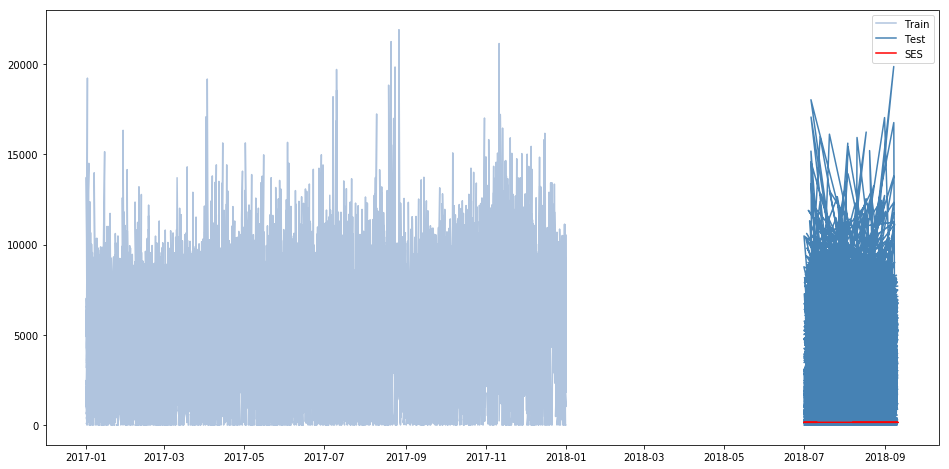

Root Mean Sqaure = 4398.08166864604


In [17]:
#Method-4 : Exponential Smoothing
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

y_hat_avg = test.copy()
fit2 = SimpleExpSmoothing(np.asarray(train['transaction_count'])).fit(smoothing_level=0.6,optimized=False)
y_hat_avg['SES'] = fit2.forecast(len(test))
plt.figure(figsize=(16,8))
plt.plot(train['transaction_count'], label='Train', color='lightsteelblue')
plt.plot(test['transaction_count'], label='Test', color='steelblue')
plt.plot(y_hat_avg['SES'], label='SES', color='r')
plt.legend(loc='best')
plt.show()


rms = sqrt(mean_squared_error(test.transaction_count, y_hat_avg.SES))
print("Root Mean Sqaure =",rms)

In [83]:
#test1 =test.index.strftime('%Y-%m-%d')
#train1 =train.index.strftime('%Y-%m-%d')
#data1= data.index.strftime('%Y-%m-%d')

In [238]:
#test1 = test.reset_index(drop=True)
#train1 = train.reset_index(drop=True)
#data1 = data.reset_index(drop=True)
test1=test.drop(['datetime', 'year', 'month',], axis=1)
train1=train.drop(['datetime', 'year'], axis=1)

#te= te.drop(['datetime'], axis=1)
#tr=tr.drop(['datetime'], axis=1)
test1.index= test1.Is_day
te=test1.drop(['Is_day'], axis=1)
train1.index= train1.Is_day
tr= train1.drop(['Is_day'], axis=1)


In [239]:
# imputing missing values
test.transaction_count[np.isnan(test.transaction_count)] = np.median(test.transaction_count[~np.isnan(test.transaction_count)])
test1.transaction_count[np.isnan(test1.transaction_count)] = np.median(test1.transaction_count[~np.isnan(test1.transaction_count)])
train.transaction_count[np.isnan(train.transaction_count)] = np.median(train.transaction_count[~np.isnan(train.transaction_count)])


C:\Users\bithi\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\bithi\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\bithi\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [240]:
# Fit the model
mod = sm.tsa.statespace.SARIMAX(data['transaction_count'], trend='c', order=(1,1,1))
res = mod.fit(disp=False)
print(res.summary())

C:\Users\bithi\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                           Statespace Model Results                           
Dep. Variable:      transaction_count   No. Observations:                66507
Model:               SARIMAX(1, 1, 1)   Log Likelihood             -590928.199
Date:                Mon, 01 Apr 2019   AIC                        1181864.398
Time:                        00:35:17   BIC                        1181900.818
Sample:                             0   HQIC                       1181875.657
                              - 66507                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.2082      1.564     -0.133      0.894      -3.273       2.857
ar.L1          0.0525      0.004     13.064      0.000       0.045       0.060
ma.L1         -0.8087      0.003   -306.530      0.0

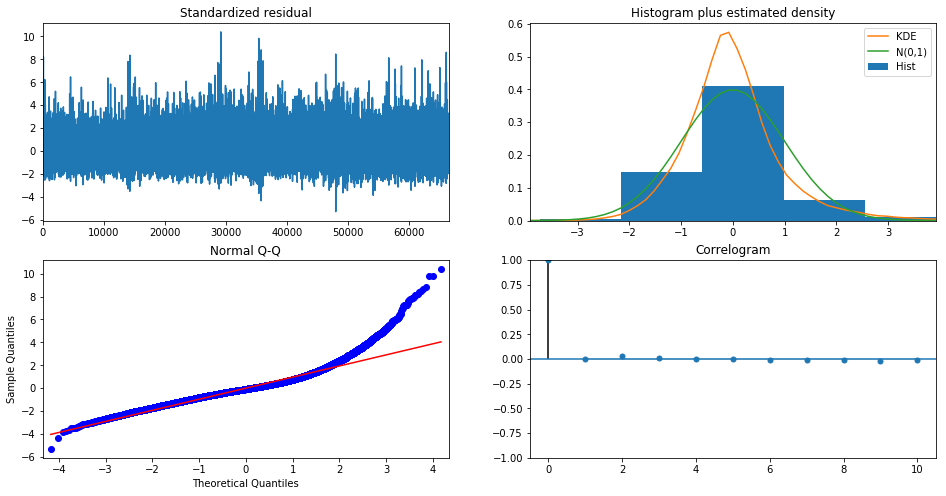

In [241]:
#to ensure that the residuals of our model are uncorrelated and normally distributed with zero-mean
res.plot_diagnostics(figsize=(16, 8))
plt.show()

In [242]:
#predict = res.get_prediction()
predict = res.get_prediction(start='2018-07-01', dynamic=False)
predict_ci = predict.conf_int()


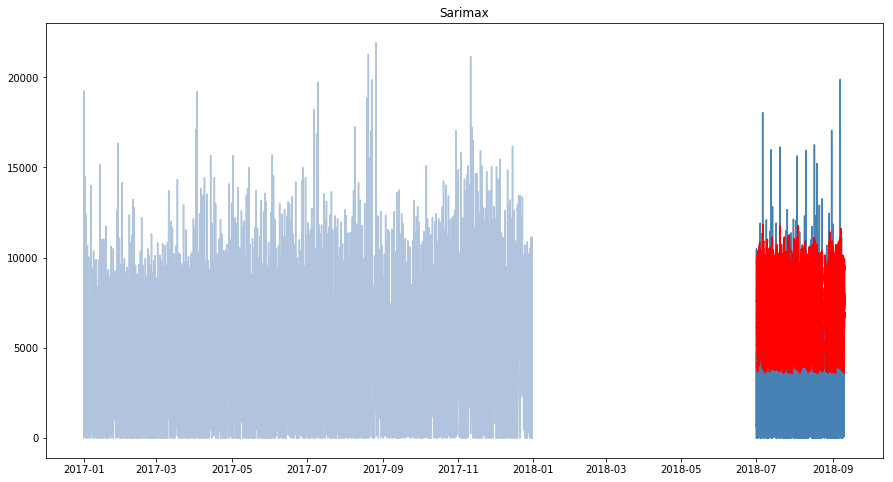

Root Mean Sqaure = 4641.933885215682


In [258]:
from sklearn.metrics import mean_squared_error
from math import sqrt
plt.figure(figsize=(15,8))
plt.plot(tr['transaction_count'], label='Train',color='lightsteelblue')
plt.plot(te['transaction_count'], label='Test', color='steelblue')
plt.plot(predict_ci['upper transaction_count'], label=' Sarimax Forecast', color='r')
plt.title("Sarimax")
plt.show()
rms = sqrt(mean_squared_error(te.transaction_count, predict_ci['upper transaction_count']))
print("Root Mean Sqaure =",rms)


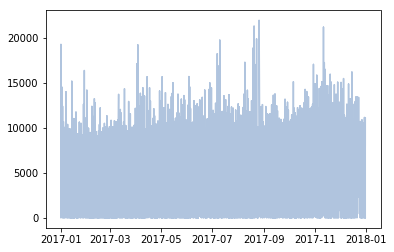

In [255]:
plt.plot(tr.index, tr['transaction_count'], color='lightsteelblue',label='Train')
plt.plot(train['transaction_count'], label='Train', color='lightsteelblue')